In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [6]:
first_reader = csv.reader(open("C:/Users/Aditi/Desktop/Prob-Stats/Individual_language_data/typescript1.csv", "rt"), delimiter=",") #read the .csv
second_reader = csv.reader(open("C:/Users/Aditi/Desktop/Prob-Stats/Individual_language_data/coffeescript1.csv", "rt"), delimiter=",") #read the .csv
next(first_reader, None) #skip the first row, that's just the column names
next(second_reader, None)
x1 = list(first_reader)
x2 = list(second_reader)

years=[]
count1=[]
count2=[]

for i in x1:
    years.append(i[0])
    count1.append(i[1])
for i in x2:
    count2.append(i[1])
    
x_vals = np.array(years).astype(np.int)
lang1_y_vals = np.array(count1).astype(np.float)
lang2_y_vals = np.array(count2).astype(np.float)


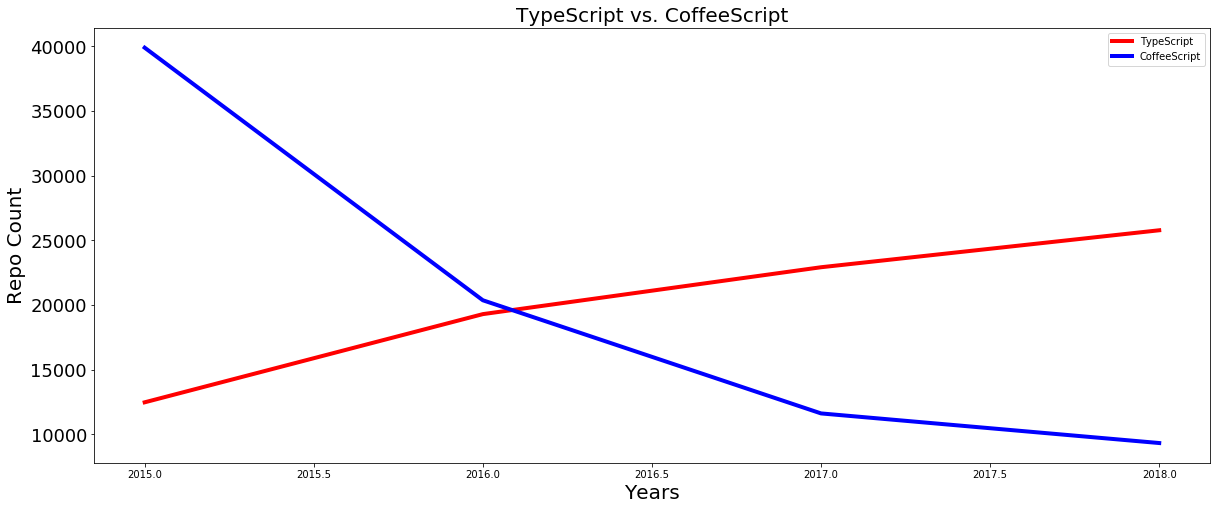

In [16]:
plt.figure(figsize=(20,8))

plt.plot(x_vals, lang1_y_vals, color='red',label='TypeScript',linestyle='solid',linewidth=4)
plt.plot(x_vals, lang2_y_vals, color='blue',label='CoffeeScript',linestyle='solid',linewidth=4)
plt.yticks(fontsize=18)

plt.xlabel('Years',fontsize=20)
plt.ylabel('Repo Count',fontsize=20)
plt.legend(loc='upper right')
plt.title('TypeScript vs. CoffeeScript',fontsize=20)
plt.show()
 

In [17]:
# def correlation(x, y):
# 	sum_xy = 0
# 	sum_x = 0
# 	sum_y = 0
# 	sum_x2 = 0
# 	sum_y2 = 0
# 	for i in range(len(x)):
# 		sum_xy = sum_xy + x[i] * y[i]
# 		sum_x = sum_x + x[i]
# 		sum_y = sum_y + y[i]
# 		sum_x2 = sum_x2 + x[i]*x[i]
# 		sum_y2 = sum_y2 + y[i]*y[i]
# 	import math
# 	r = (len(x)*sum_xy - sum_x*sum_y)/math.sqrt((len(x)*sum_x2-sum_x*sum_x)*(len(x)*sum_y2-sum_y*sum_y))
# 	return r

import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def correlation(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [18]:
r=correlation(lang1_y_vals,lang2_y_vals)
print ("correlation= ",r)

print ("ts mean= ", np.mean(lang1_y_vals))
print ("cs mean= ", np.mean(lang2_y_vals))

import math
n=4
a = r*math.sqrt((n-2)/(1 - r*r))
print ("student's t-test= ",a)


correlation=  -0.986222506114
ts mean=  20120.0
cs mean=  20304.5
student's t-test=  -8.43122820132


In [19]:
# total_lang1=np.sum(np_y_vals)
# total_lang2=np.sum(sc_y_vals)
lang1_y_vals_copy = np.copy(lang1_y_vals)
lang1_y_vals_copy1 = np.copy(lang1_y_vals)
lang2_y_vals_copy1 = np.copy(lang2_y_vals)


for i in range(0,len(lang1_y_vals)):
    lang1_y_vals[i]=lang1_y_vals[i]/(lang2_y_vals[i]+lang1_y_vals[i])*100

for i in range(0,len(lang2_y_vals)):
    lang2_y_vals[i]=lang2_y_vals[i]/(lang2_y_vals[i]+lang1_y_vals_copy[i])*100

for i in range(1,len(lang1_y_vals_copy1)):
    lang1_y_vals_copy1[i]=lang1_y_vals_copy1[i]-lang1_y_vals_copy1[i-1]

for i in range(1,len(lang2_y_vals)):
    lang2_y_vals_copy1[i]=lang2_y_vals_copy1[i]-lang2_y_vals_copy1[i-1]



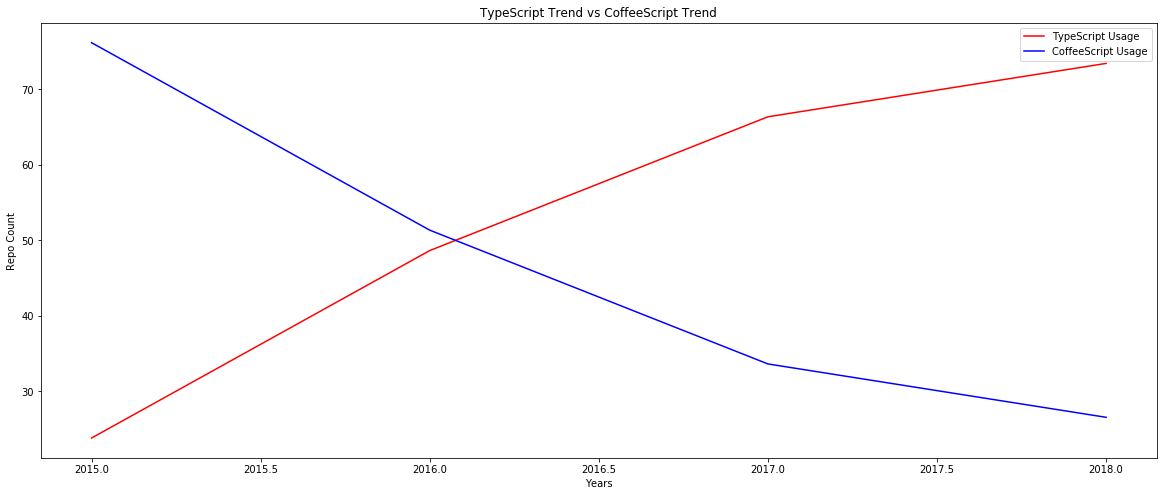

In [12]:
plt.figure(figsize=(20,8))

#Uncomment these lines for a bar graph
# y_pos = np.arange(len(x_vals))
# print (y_pos)
# plt.bar(y_pos, y_vals, align='center', alpha=0.5)
# plt.xticks(y_pos, x_vals)
# plt.ylabel('Usage')
# plt.xlabel('Years')
# plt.title('Scipy usage over the years')

plt.plot(x_vals, lang1_y_vals, color='red', label='TypeScript Usage')
plt.plot(x_vals, lang2_y_vals, color='blue',label='CoffeeScript Usage')
plt.xlabel('Years')
plt.ylabel('Repo Count')
plt.legend(loc='upper right')
plt.title('TypeScript Trend vs CoffeeScript Trend')
plt.show()

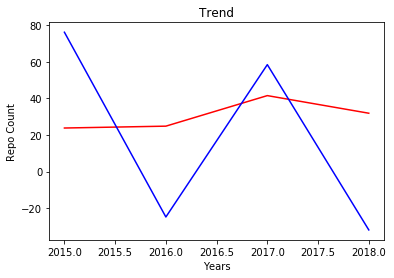

In [11]:
plt.plot(x_vals, lang1_y_vals_copy1, color='red')
plt.plot(x_vals, lang2_y_vals_copy1, color='blue')
plt.xlabel('Years')
plt.ylabel('Repo Count')
plt.title('Trend')
plt.show()